In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd

from weave_units import WeaveUnit
from tile_map import Tiling

## Read the data
This time I left the filenames a loan. This is not a drill.

In [2]:
gwr1 = gpd.read_file("../data/001290-results-GWR_fixbw-COVID_cases_per_1000persons__over_both_periods-regen-convent-BlackAsianHispanic-COVID_days-life_expect.gpkg")
gwr1["ID"] = list(range(gwr1.shape[0]))

gwr2 = gpd.read_file("../data/006092-results-GWR_fixbw-COVID_cases_per_1000persons__over_period_1-BlackAsianHispanic.gpkg")
gwr2["ID"] = list(range(gwr2.shape[0]))

# 7 variates
This weave seems to produce a nice effect.

<AxesSubplot:>

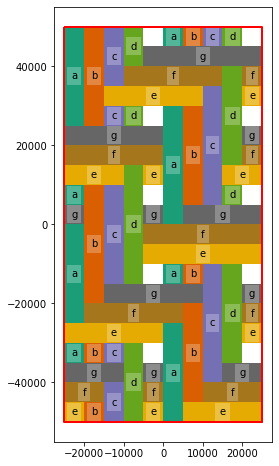

In [3]:
w1 = WeaveUnit(strands = "abcd-|efg-", weave_type = "twill", n = 5,
               aspect = 1, spacing = 5000, crs = gwr1.crs)
w1.plot()

In [4]:
w1_tiling = Tiling(w1, gwr1, id_var = "ID")

In [5]:
w1_map = w1_tiling.get_tiled_map(rotation = 30, prioritise_tiles = True)

Now we've got a tiled map, we have to set up `element_id:variable_name` and `variable_name:cmap` lookups as the `TiledMap` `variables` and `colourmaps` dictionaries, respectively.

We can also configure `dpi` and `figsize` (other things too, but just these for now). Note that we can also do this when we call the `render()` method as is done here for `legend_zoom`.

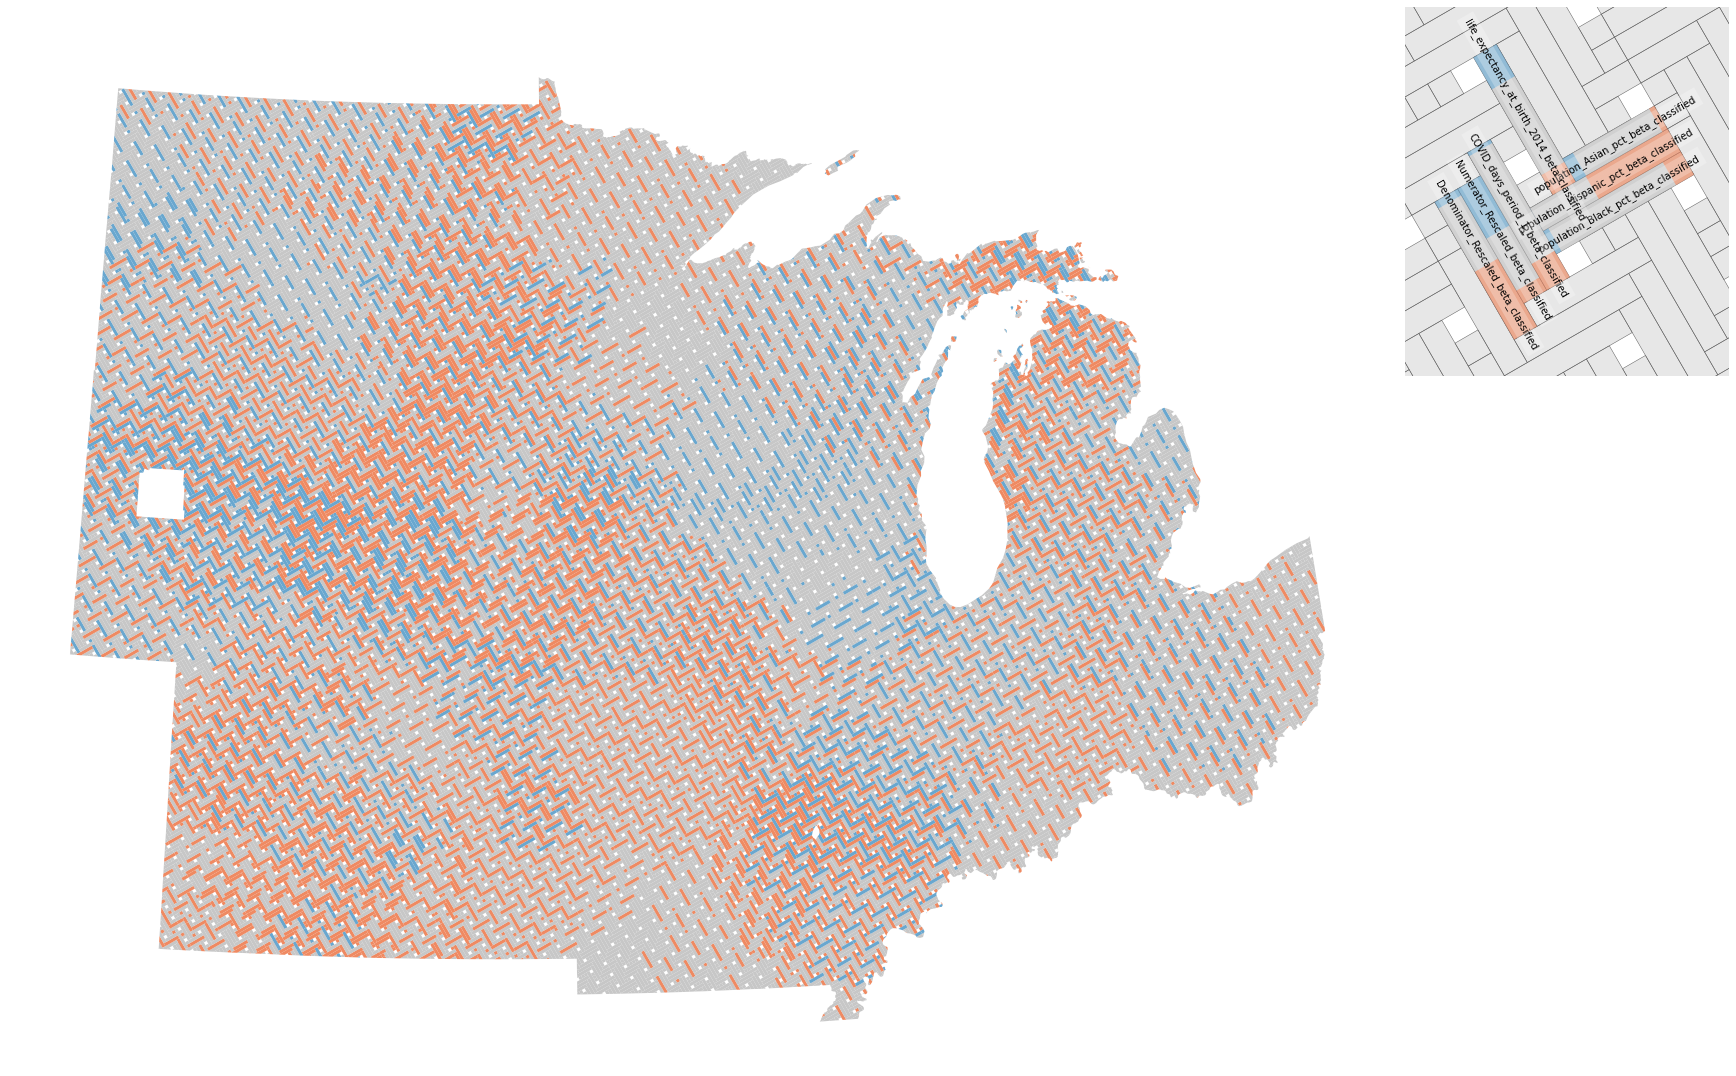

In [6]:
w1_map.variables = dict(zip(list("abcdefg"),
                           ['life_expectancy_at_birth_2014_beta_classified',
                            'Denominator_Rescaled_beta_classified', 'Numerator_Rescaled_beta_classified',
                            'COVID_days_period_1_beta_classified', 'population_Black_pct_beta_classified', 'population_Hispanic_pct_beta_classified', 'population_Asian_pct_beta_classified']))
w1_map.colourmaps = dict(zip(
    w1_map.variables.values(),
    7 * [{'associated with LESS covid': "#69A7CF",
          'not significant': "#C7C7C7",
          'associated with MORE covid': "#EF8A62"}]))
w1_map.dpi = 150
w1_map.figsize = (24, 18)

fig = w1_map.render(legend_zoom = 0.8)
fig.savefig("weave1.pdf")

## 3 Variates
Use the same weave, but without any warps. (So it's not really a weave... but is directly comparable with the other example.)

<AxesSubplot:>

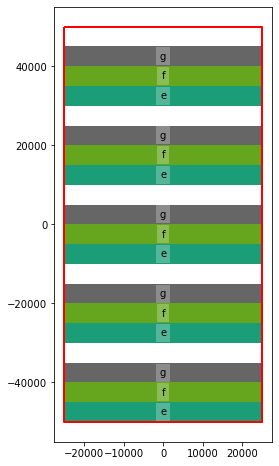

In [7]:
w2 = WeaveUnit(strands = "-----|efg-", weave_type = "twill", n = 5,
               aspect = 1, spacing = 5000, crs = gwr1.crs)
w2.plot()

In [8]:
w2_tiling = Tiling(w2, gwr2, id_var = "ID")

In [13]:
w2_map = w2_tiling.get_tiled_map(rotation = 30, prioritise_tiles = True)

Since the weaves matche we can reuse `variables` although we should remove the missing `element_ids`. We can probably do some cleverer coding of the `TiledMap` class to allow it to ignore missing elements if it happens to be setup with `variables` and `colourmaps` specs that contain such. In general we probably need to think about a smarter API for tweaking these attributes and discouraging direct access as in this notebook (we can't make them private because python).

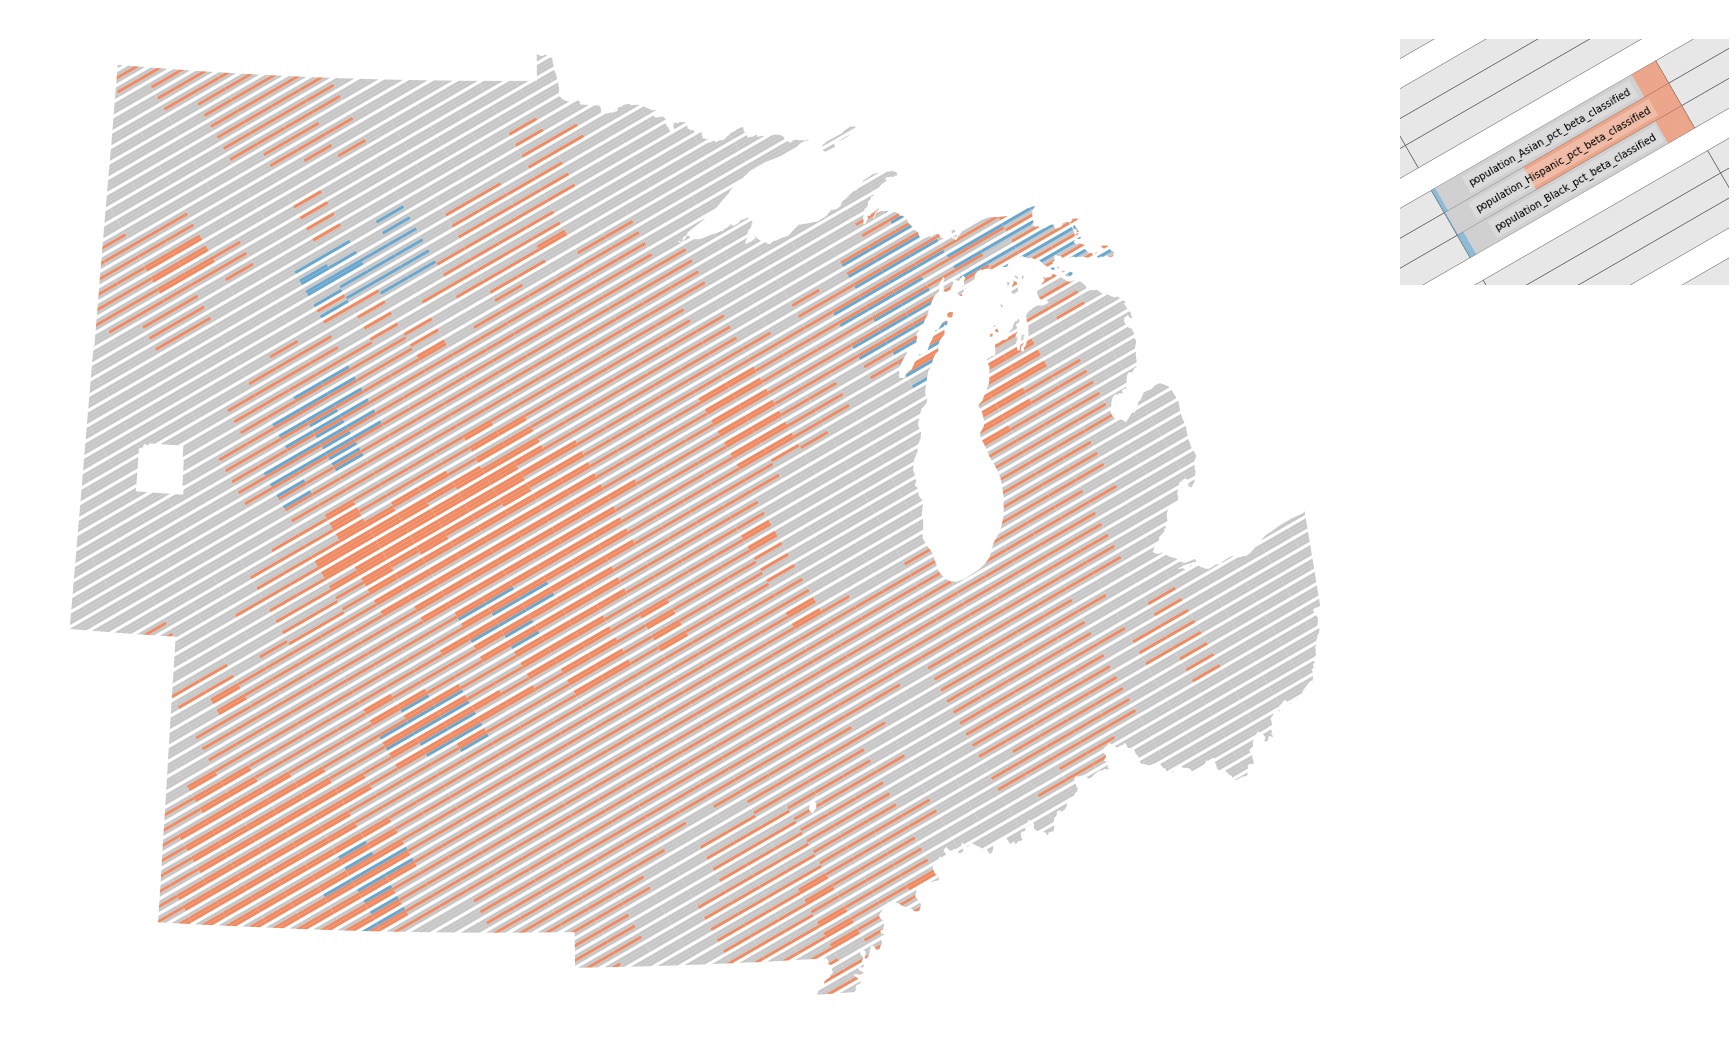

In [14]:
w2_map.variables = dict(w1_map.variables)
w2_map.colourmaps = dict(w1_map.colourmaps)

# remove the missing elements
for id in list("abcd"):
    var = w2_map.variables[id]
    del w2_map.variables[id]
    del w2_map.colourmaps[var]

w2_map.legend_zoom = 0.8
w2_map.dpi = 150
w2_map.figsize = (24, 18)

fig = w2_map.render()
fig.savefig("weave2.pdf")